# Exercise: Analysis of taxi ride data


In this project you will use the Pandas and Seaborn packages to make some basic computations and plots for a data set on taxi rides in New York. The idea is to serve as a hands-on introduction to Pandas and Seaborn, which are both commonly used packages for handling data in Python.

Generally, you are expected to be able to find the information you need in the respective package documentations; [Pandas](https://pandas.pydata.org/docs/) and [Seaborn](https://seaborn.pydata.org/), or by simply googling. CHATGPT can be useful, but usually a simple search engine gets the job done with a much smaller environmental impact.


## Load the libraries you need


In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("retina", "png")
sns.set()
sns.set_style("ticks")
# scale down size of default plots
sns.set_context("paper")
import matplotlib as mpl

scale = 0.8
d = dict([(k, v * scale) for (k, v) in sns.plotting_context("paper").items()])
d["figure.figsize"] = [5.4, 3.5]
mpl.rcParams.update(d)

## Load the data set


Pickup and dropoff are in a fancy date-time format so here we help you exchange them for a simpler `duration` column for the number of minutes that each taxi ride takes.


In [ ]:
import seaborn as sns

rides = sns.load_dataset("taxis")
rides["duration"] = [x.total_seconds() / 60 for x in (rides.dropoff - rides.pickup)]
rides = rides[[x for x in rides.columns if x not in ["pickup", "dropoff"]]]
rides.head()

## Exercise 1


**Get the `pickup_zones` of the five taxi rides that took the longest time:**


In [ ]:
# Selecting the top 5 rows with the greatest duration times
top_longest_rides = rides.nlargest(5, "duration")

# Extract the 'pickup_zone' of these rides
pickup_zones_longest_rides = top_longest_rides["pickup_zone"]
print(pickup_zones_longest_rides)

## Exercise 2


**Get the mean fare for each pickup_borough:**


In [ ]:
# Calculate the mean fare for each pickup_borough
mean_fare_by_borough = rides.groupby("pickup_borough")["fare"].mean()

# Display the result
print(mean_fare_by_borough)

## Exercise 3


**Are rides paid in cash shorter in distance than those paid by credit card?** Note: You can just find the mean duration for each payment type and compare them, but there is an instructor bonus point (highly valuable currency) for actually testing with a statistical test.


In [ ]:
from scipy.stats import ttest_ind

# Calculate the mean distance for each payment type
mean_distance_by_payment = rides.groupby("payment")["distance"].mean()
print("Mean distance by payment type:")
print(mean_distance_by_payment)

# T-test: Extract distances based on payment type
cash_distances = rides.loc[rides["payment"] == "cash", "distance"]
credit_card_distances = rides.loc[rides["payment"] == "credit card", "distance"]


# T-test: Perform the T-test
t_stat, p_value = ttest_ind(cash_distances, credit_card_distances, equal_var=False)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# T-test: Interpret the results
alpha = 0.05
if p_value < alpha:
    print(
        "There is a statistically significant difference in distances between cash and credit card payments."
    )
else:
    print(
        "There is no statistically significant difference in distances between cash and credit card payments."
    )

## Exercise 4


**In which borough do taxis most often pick up more than one passenger?** Note: The mean is not the answer here, since that could be misleading.


In [ ]:
# Save #rides for each borough that had passengers more than 1
passenger_counts = rides[rides["passengers"] > 1].groupby("pickup_borough").size()

# Save all of the rides for each borough
total_counts = rides.groupby("pickup_borough").size()

# Calculate the ratio of rides that had more than 1 passengers over the total rides; also sort the Series
passenger_ratio = (passenger_counts / total_counts).sort_values(ascending=False)

# Convert Series to Dataframe
passenger_ratio_df = passenger_ratio.reset_index()
# Set column names
passenger_ratio_df.columns = ["Pickup borough", "Ratio"]

# Display the result
print(passenger_ratio_df.to_string())

As you can see Manhattan borough has the highest ratio of: 0.27, where ratio means the number of rides that had more than 1 passengers over the total number of rides in the borough.


## Exercise 5


Compute mean tip for all combinations of `pickup_borough` and `dropoff_borough`. It should look like this:


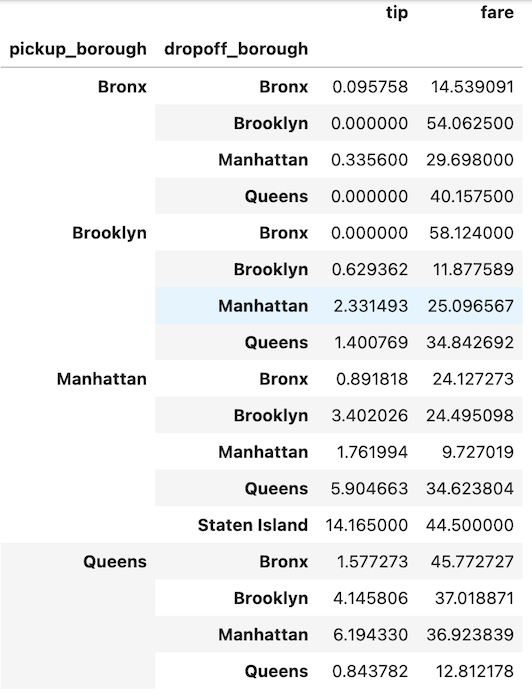


In [ ]:
rides.groupby(["pickup_borough", "dropoff_borough"])["fare"].mean()

## Exercise 6


Add a new column, `generosity`, to the dataframe you produced in the previous exercise. It should be `tip/fare`:


In [ ]:
rides["generosity"] = rides["tip"] / rides["fare"]
rides

## Exercise 7


Make a barplot (`sns.barplot`) with these parameters: `data=rides, x='pickup_borough', y='generosity', hue='dropoff_borough', palette=colorblind`.
**Where do generous people live? Comment on the reliablility of this data.**


In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=rides,
    x="pickup_borough",
    y="generosity",
    hue="dropoff_borough",
    palette="colorblind",
)
plt.title("Generosity by Pickup Borough and Dropoff Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Generosity")
plt.legend(title="Dropoff Borough")
plt.show()

Generous people seem to live on Staten Island - though there are few datapoints and it might be skewed by the ferry!!!


## Exercise 8


Produce this plot (see the [boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)):


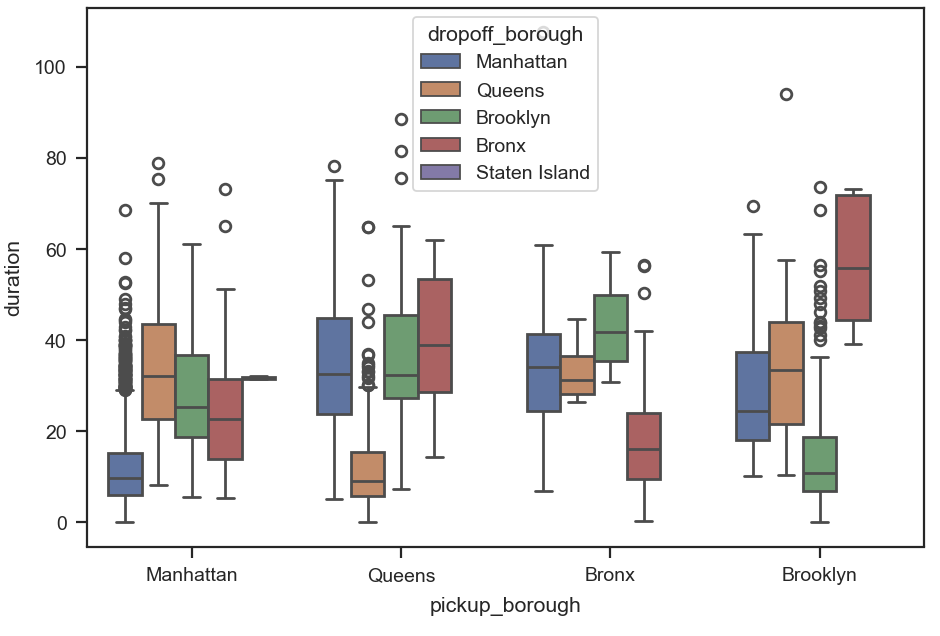


## Exercise 9


Make a histogram of the tip for fares starting on Manhattan and ending in Queens:


## Exercise 10


Produce this plot, where datapoints are colored by the color of the taxi: (You may want to look up Seaborn's "FacetGrid")


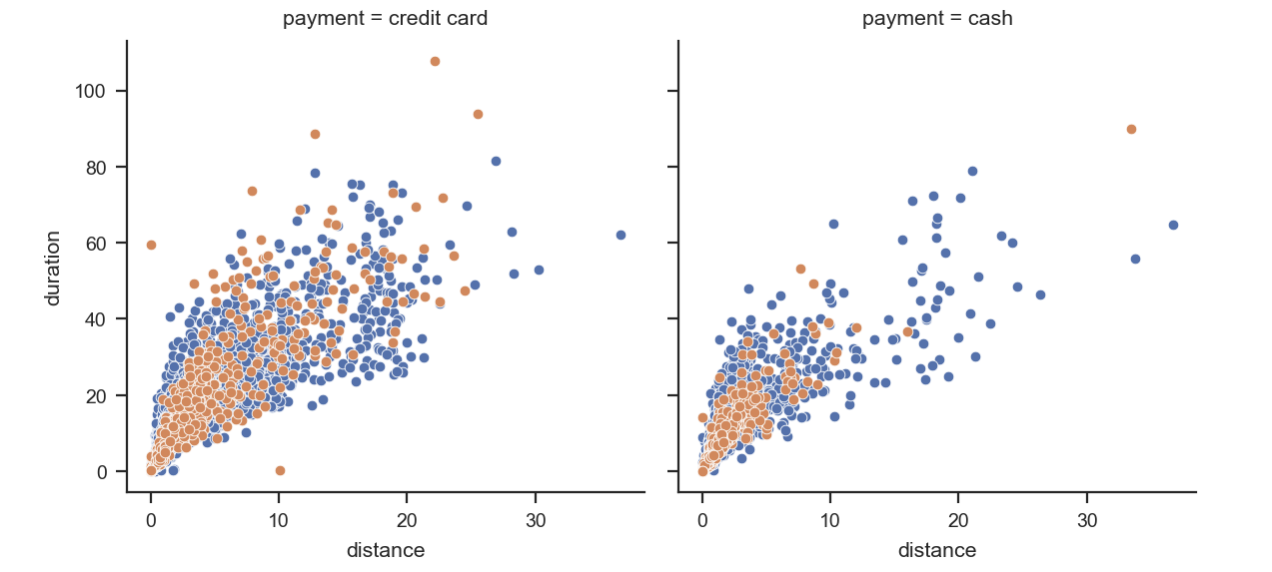


In [ ]:
# Initialize a FacetGrid with Seaborn
g = sns.FacetGrid(
    rides,
    col="payment",
    hue="color",
    col_order=["credit card", "cash"],  # Left plot: credit card, Right plot: cash
    height=5,
    aspect=1,
)  # Customize plot height and width

# Map a scatterplot to the FacetGrid
g.map_dataframe(sns.scatterplot, x="distance", y="duration")

# Add legends for hue
g.add_legend(title="Taxi Color")

# Set axis labels
g.set_axis_labels("Distance", "Duration")

# Set titles for each facet
g.set_titles(col_template="{col_name} Payments")

# Display the plot
plt.show()

# Exercise 11


Produce this plot where the color of the datapoints is also determined by the color of the taxi:


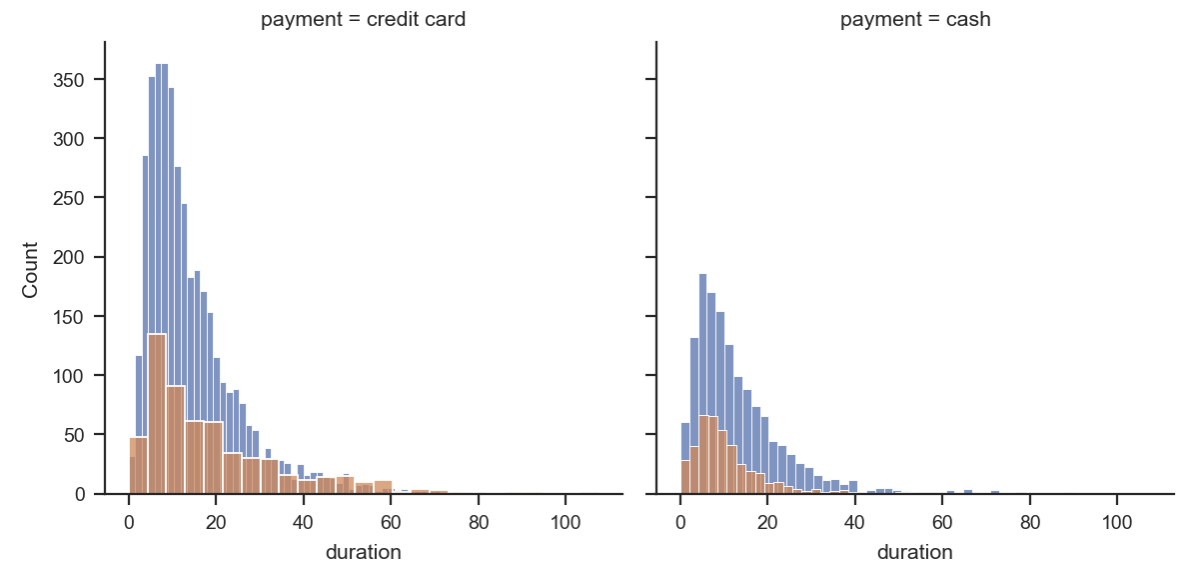


In [ ]:
# Initialize a FacetGrid with Seaborn
g = sns.FacetGrid(
    rides,
    col="payment",
    hue="color",
    col_order=["credit card", "cash"],  # Left plot: credit card, Right plot: cash
    height=5,
    aspect=1.2,
)  # Customize plot height and width

# Map a scatterplot to the FacetGrid
g.map_dataframe(sns.histplot, x="duration", multiple="layer")

# Add legends for hue
g.add_legend(title="Taxi Color")

# Set axis labels
g.set_axis_labels("Duration", "Count")

# Set titles for each facet
g.set_titles(col_template="{col_name} Payments")

# Display the plot
plt.show()